# Threshold & GMM Analysis

plotting points to image
threshold 5000
threshold 6000
threshold 7000
threshold 8000
threshold 9000
threshold 10000
threshold 11000
threshold 12000
threshold 13000
threshold 14000
threshold 15000
threshold 16000
threshold 17000
threshold 18000
threshold 19000
threshold 20000
threshold 21000
threshold 22000
threshold 23000
threshold 24000
threshold 25000
threshold 26000
threshold 27000
threshold 28000
threshold 29000
threshold 30000
threshold 31000
threshold 32000
threshold 33000
threshold 34000
threshold 35000
threshold 36000
threshold 37000
threshold 38000
threshold 39000
[0.03, 0.07, 0.238, 0.315, 0.391, 0.417, 0.449, 0.484, 0.553, 0.559, 0.547, 0.635, 0.629, 0.679, 0.727, 0.763, 0.783, 0.79, 0.805, 0.797, 0.798, 0.845, 0.85, 0.856, 0.856, 0.874, 0.901, 0.878, 0.863, 0.861, 0.892, 0.886, 0.879, 0.892, 0.879]
[0.031, 0.074, 0.287, 0.412, 0.566, 0.608, 0.673, 0.8, 0.993, 0.778, 0.705, 0.674, 0.619, 0.551, 0.529, 0.495, 0.461, 0.443, 0.424, 0.422, 0.406, 0.377, 0.366, 0.356, 0.329, 0.32

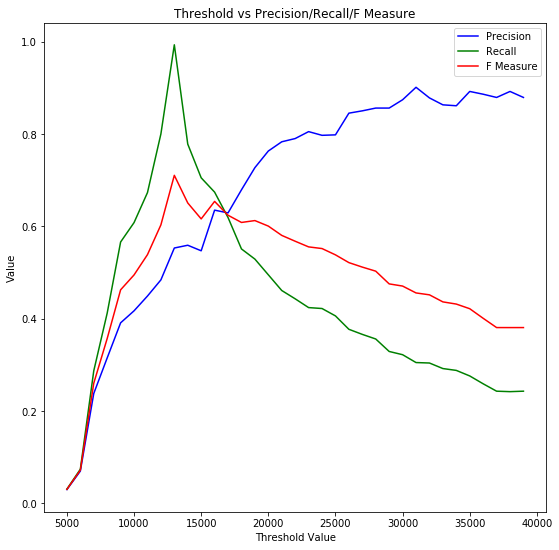

In [15]:
%reload_ext autoreload
%autoreload 2
from IPython.core.pylabtools import figsize
figsize(9, 9)

from tifffile import imread, imsave
from BlobDetector import BlobDetector
from BlobMetrics import BlobMetrics
from sklearn.mixture import GaussianMixture
import util
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from datetime import datetime
from skimage import morphology

exp_name = 'cell_detection_9'

component_dict = {
    'cell_detection_0': 4,
    'cell_detection_1': 4,
    'cell_detection_2': 4,
    'cell_detection_3': 4,
    'cell_detection_4': 8,
    'cell_detection_5': 4,
    'cell_detection_6': 4,
    'cell_detection_7': 5,
    'cell_detection_8': 4,
    'cell_detection_9': 4
}

data_source = 'COLM' if int(exp_name.split('_')[2]) <= 3 else 'laVision'

input_tif_path = '../data/s3617/tifs/{}.tiff'.format(exp_name)
output_csv_path = '../data/s3617/prediction_csv/{}.csv'.format(exp_name)
img = imread(input_tif_path)

shape_z, shape_y, shape_x = img.shape

ground_truth_path = '../data/s3617/annotations/{}.csv'.format(exp_name)
ground_truth = util.get_list_from_csv(ground_truth_path)
print('plotting points to image')
util.plot_csv_on_rgb_tif(ground_truth, input_tif_path, 'marked_final.tiff', color=[0, img.max(), 0])

precisions = []
recalls = []
f_measures = []
thresholds = [t for t in range(5000, 40000, 1000)]

for threshold in thresholds:
    print('threshold', threshold)
    detector = BlobDetector(input_tif_path, n_components=component_dict[exp_name], threshold=threshold)
    centroids = detector.get_blob_centroids()
    util.write_list_to_csv(centroids, output_csv_path)

    #util.plot_csv_on_rgb_tif(centroids, 'marked_final.tiff', 'marked_final.tiff', color=[img.max(), 0, 0])
    metrics = BlobMetrics(ground_truth, centroids, euclidean_distance_threshold=12)
    #print('Precision: {}\nRecall: {}\nF-Measure: {}\n\n'.format(metrics.precision(), metrics.recall(), metrics.f_measure()))
    
    precisions.append(metrics.precision())
    recalls.append(metrics.recall())
    f_measures.append(metrics.f_measure())
    
print(precisions)
print(recalls)
print(f_measures)

# precisions = [0.244, 0.417, 0.492, 0.61, 0.806, 0.889, 0.913, 0.947, 1.0, 1.0, 1.0, 0.909, 0.909, 1.0, 1.0, 1.0, 0.778, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# recalls = [0.255, 0.473, 0.674, 0.862, 0.641, 0.571, 0.488, 0.409, 0.311, 0.289, 0.244, 0.227, 0.227, 0.2, 0.156, 0.156, 0.163, 0.133, 0.089, 0.091, 0.067, 0.067, 0.067, 0.067, 0.067, 0.044, 0.044, 0.044, 0.044, 0.044, 0.044, 0.044, 0.044, 0.044, 0.044]
# f_measures = [0.24937875751503005, 0.443238202247191, 0.5687958833619211, 0.7144293478260869, 0.714092605390463, 0.6953684931506848, 0.6360371163454676, 0.5712728613569321, 0.4744469870327994, 0.4484096198603569, 0.3922829581993569, 0.3632799295774648, 0.3632799295774648, 0.33333333333333337, 0.2698961937716263, 0.2698961937716263, 0.26953028692879916, 0.23477493380406003, 0.16345270890725436, 0.16341189674523007, 0.12558575445173384, 0.12558575445173384, 0.12558575445173384, 0.12558575445173384, 0.12558575445173384, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359, 0.08429118773946359]
plt.plot(thresholds, precisions, color='b', label='Precision')
plt.plot(thresholds, recalls, color='g', label='Recall')
plt.plot(thresholds, f_measures, color='r', label='F Measure')
plt.xlabel('Threshold Value')
plt.ylabel('Value')
plt.title('Threshold vs Precision/Recall/F Measure')
plt.legend()
plt.show()
    

#imsave('threshold_analysis_{}.tiff'.format(exp_name), detector.thresholded_img.astype(np.uint8))
# metrics.plot_ground_truths_per_prediction()
# metrics.plot_predictions_per_ground_truth()